# CLUSTERIZAÇÃO VARIÁVEIS CRUAS:

CNAE_FISCAL_PRINCIPAL - MUNICÍPIO - ANO

In [1]:
import pandas as pd
df = pd.read_csv('df_final_cp+cs.csv')
df

,DATA_DE_INÍCIO_ATIVIDADE,CNAE_FISCAL_PRINCIPAL,CNAE_FISCAL_SECUNDÁRIA,MUNICÍPIO
0,2023,4644301,4645101,7885
1,2023,4637104,4691500,1569
2,2023,4647801,4641902,1219
3,2023,4647801,4635401,1219
4,2023,4647801,4623109,1219
...,...,...,...,...
85176660,1903,9430800,9499500,921
85176661,1901,9430800,9499500,8927
85176662,1901,9430800,9493600,8927
85176663,1901,6912500,9609299,6645


In [2]:
dados_cluster = df[['CNAE_FISCAL_PRINCIPAL', 'CNAE_FISCAL_SECUNDÁRIA','MUNICÍPIO', 'DATA_DE_INÍCIO_ATIVIDADE']]
dados_cluster

,CNAE_FISCAL_PRINCIPAL,CNAE_FISCAL_SECUNDÁRIA,MUNICÍPIO,DATA_DE_INÍCIO_ATIVIDADE
0,4644301,4645101,7885,2023
1,4637104,4691500,1569,2023
2,4647801,4641902,1219,2023
3,4647801,4635401,1219,2023
4,4647801,4623109,1219,2023
...,...,...,...,...
85176660,9430800,9499500,921,1903
85176661,9430800,9499500,8927,1901
85176662,9430800,9493600,8927,1901
85176663,6912500,9609299,6645,1901


In [3]:
# Realize a amostragem aleatória simples com 0,001% dos dados
dados_cluster = dados_cluster.sample(frac=0.0001, random_state=42)
dados_cluster

,CNAE_FISCAL_PRINCIPAL,CNAE_FISCAL_SECUNDÁRIA,MUNICÍPIO,DATA_DE_INÍCIO_ATIVIDADE
13371777,4781400,4783102,9701,2021
17844177,1821100,7420004,5403,2021
16910876,8230001,8599699,6377,2021
49398932,8130300,3299099,2913,2015
23025343,5620104,7911200,3215,2020
...,...,...,...,...
21782925,4744099,2511000,7735,2020
68496831,121101,134200,6225,2009
60948296,4929901,4924800,6001,2012
56463131,6203100,6209100,7107,2013


In [4]:
# transformações necessárias para aplicação do algoritmo
# Converter as colunas "MUNICÍPIO" e "CNAE_FISCAL_PRINCIPAL" em string
dados_cluster["MUNICÍPIO"] = dados_cluster["MUNICÍPIO"].astype(str)
dados_cluster["CNAE_FISCAL_PRINCIPAL"] = dados_cluster["CNAE_FISCAL_PRINCIPAL"].astype(str)
dados_cluster["CNAE_FISCAL_SECUNDÁRIA"] = dados_cluster["CNAE_FISCAL_SECUNDÁRIA"].astype(str)

# Agrupar o DataFrame pelos campos desejados
grupo = dados_cluster.groupby(["DATA_DE_INÍCIO_ATIVIDADE", "MUNICÍPIO", "CNAE_FISCAL_PRINCIPAL", "CNAE_FISCAL_SECUNDÁRIA"]).size().reset_index(name="Contagem")

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dados_cluster_scaled = scaler.fit_transform(grupo)

pca = PCA(n_components=2)  # k é o número de componentes principais desejados
X = pca.fit_transform(dados_cluster_scaled)

componentes_principais = pca.components_
variancia_explicada = pca.explained_variance_ratio_


Número de clusters encontrados: 3


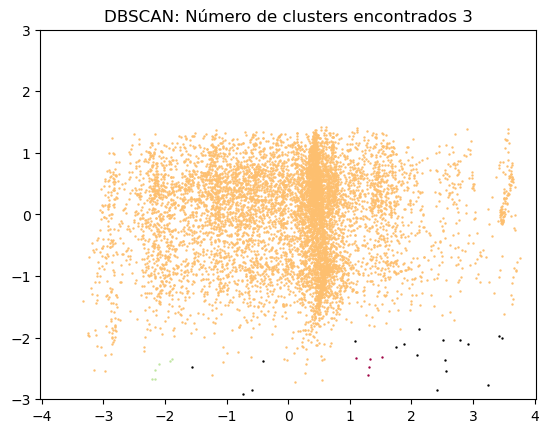

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Aplicando o DBSCAN
eps = 0.3  # Parâmetro de distância máxima entre os pontos do mesmo cluster
min_samples = 5  # Número mínimo de pontos para formar um cluster
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X)

# Obtendo a quantidade de clusters encontrados
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Número de clusters encontrados: {n_clusters}")

# Criando um gráfico colorido dos clusters
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Ruído é exibido em preto
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], marker='o', s=0.5)

plt.title('DBSCAN: Número de clusters encontrados {}'.format(n_clusters))

# Centralizar o gráfico na origem
plt.axis('equal')
plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.show()